In [1]:
import pandas as pd
import numpy as np
from preprocessing.config import settings
from data_transformations import nbaData
from modelling import k_means, Kmeans_results,pca
from plot import biplot,choose_K_means,choose_K_means_sil,spectral_Kmeans, Kmeans_plot
from sklearn.preprocessing import StandardScaler
from nba_api.stats.endpoints import leaguedashplayerstats

In [7]:
raw = leaguedashplayerstats.LeagueDashPlayerStats(season='2019-20').get_data_frames()[0]
nba_data_obj = nbaData(raw)
df = nba_data_obj.get_data(scaled=True)
print(df.head())
print('### Nulls by Columns ###')
print(df.isnull().sum())

                      FG_PCT    FT_PCT      FG3M       PTS       REB  \
Player                                                                 
James Harden       -0.241952  1.015767  3.764332  3.855722  0.984761   
Anthony Davis       0.532417  0.843931  0.063125  2.537075  2.115875   
Damian Lillard      0.007421  1.223780  3.414145  3.156749  0.056121   
Kawhi Leonard       0.099295  1.205692  1.203082  2.692821  1.188047   
Karl-Anthony Towns  0.598041  0.391729  2.460448  2.594735  2.730723   

                         AST       STL       BLK       TOV          z  
Player                                                                 
James Harden        3.342070  2.972876  0.981815 -3.986793  12.688598  
Anthony Davis       0.647946  1.999354  4.304724 -1.471102  11.573345  
Damian Lillard      3.497500  0.929549 -0.299235 -2.031323   9.954706  
Kawhi Leonard       1.338747  2.890848  0.273866 -1.631183   9.261215  
Karl-Anthony Towns  0.242100  0.620147  1.722994 -2.281550   9.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/urielf/PycharmProjects/fantasy-clusters/data_transformations.py:33: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  x_scaled = sc.transform(df)


In [3]:
k = k_means(df,3)
p = pca(df)
pca_coef = p[0]
pca_scores = p[1]

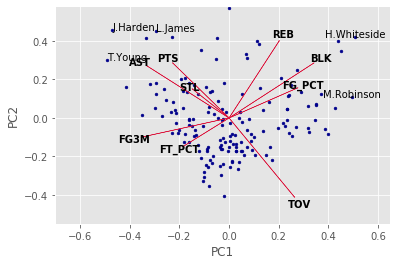

In [4]:
biplot(df,pca_coef,pca_scores)